**Business Understanding: ** You work for a consumer finance company that specialises in providing various types of loans to urban customers. When the company receives a loan application, it has to decide whether to approve or reject it based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

If the applicant is not likely to repay the loan, i.e., they are likely to default, then approving the loan may lead to financial loss for the company.

In [268]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [269]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [270]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [271]:
#read the data set of in inp0.
inp0= pd.read_csv("/content/drive/MyDrive/Upgrad Colab/EDA Case Study/loan.csv")
inp0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


We can decide on important columns based on looking at the columns data. 

In [272]:
inp0.columns


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

We can see that some of the important columns in the dataset are loan_amount, term, interest rate, grade, sub grade, annual income, purpose of the loan etc. and the target variable is loan status.

### DATA PROCESSING

In [273]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [274]:
inp0.isnull().sum()
#checking the null values 


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [275]:
#converting into percentage:
inp0.isnull().sum()/len(inp0.index)*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

We can see that a lot of columns have 100 percent missing values so removing them first

In [276]:
missing_col = inp0.columns[100*(inp0.isnull().sum()/len(inp0.index)) > 90]
print(missing_col)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [277]:
inp0 = inp0.drop(missing_col, axis=1)
print(inp0.shape)

(39717, 55)


In [278]:
inp0.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


In [279]:
#droping the columns with more than 30% missing values.
inp0 = inp0.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [280]:
#sumarizing the columns
100*(inp0.isnull().sum()/len(inp0.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [281]:
#We have seen above that in inp0.info() interest rate is in the form of object so we need to convert into Float64 like other


inp0['int_rate'] = inp0['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [282]:
inp0['emp_length'].describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [283]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [284]:
# also, lets extract the numeric part from the variable employment length

# first, let's drop the missing values from the column (otherwise the regex code below throws error)
inp0 = inp0[~inp0['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
import re
inp0['emp_length'] = inp0['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
inp0['emp_length'] = inp0['emp_length'].apply(lambda x: pd.to_numeric(x))

### DATA ANALYSIS


In [285]:
# we have sorted the data and cleaned it fairly to our usage now in order to do the data analysis we need to drop some columns which are not needed.

rand_col =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type", 'title', 'url', 'zip_code', 'addr_state']
df = inp0.drop(rand_col, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [286]:
# Now we shall look how much loans are paid off ancount them:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [287]:
#Convetring them into Binary 0/1 1: Not paid, 0: Fully Paid->

df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()


0    32145
1     5399
Name: loan_status, dtype: int64

#### Starting the basic Univariate Analysis:


In [288]:
# default rate
round(np.mean(df['loan_status']), 2)

0.14

The overall default rate is about 14%.  

Let's first visualise the average default rates across categorical variables.


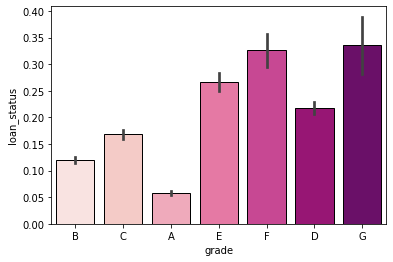

In [289]:
from seaborn.widgets import color_palette
# plotting default rates across grade of the loan

sns.barplot(x='grade', y='loan_status', data=df,   edgecolor='black', palette='RdPu')
plt.show()

In [290]:
# lets define a function to plot loan_status across categorical variables
def plotting_categorical(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=df,orient='v',edgecolor='black', palette='RdPu')
    plt.show()
    

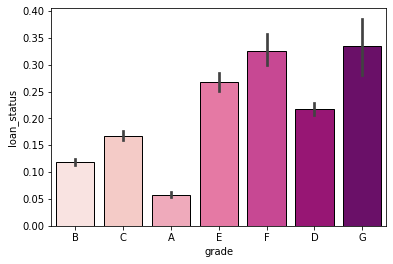

In [291]:
# compare default rates across grade of loan
plotting_categorical('grade')

Clearly, as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the riskiness of the loan. 

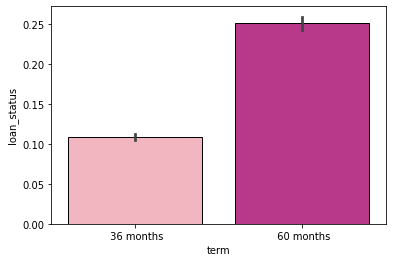

In [292]:
# term: 60 months loans default more than 36 months loans
plotting_categorical('term')

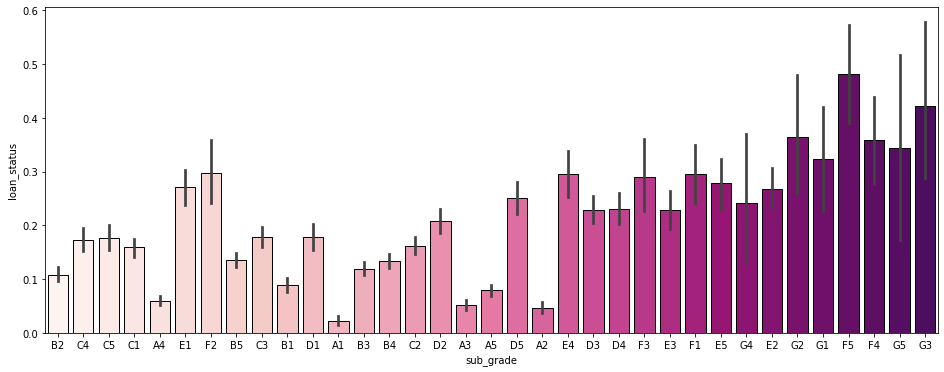

In [293]:
# sub-grade: as expected - A1 is better than A2 better than A3 and so on 
plt.figure(figsize=(16, 6))
plotting_categorical('sub_grade')

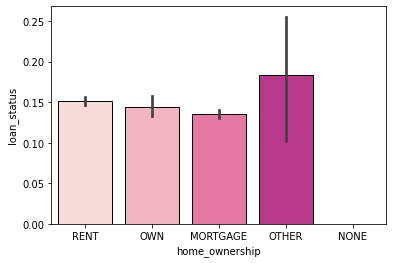

In [294]:
# home ownership: not a great discriminator
plotting_categorical('home_ownership')

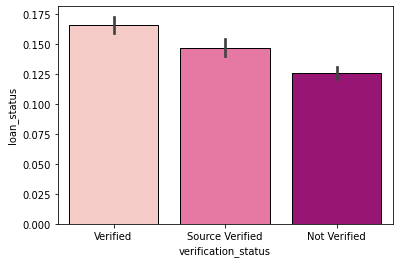

In [295]:
# verification_status: surprisingly, verified loans default more than not verifiedb
plotting_categorical('verification_status')

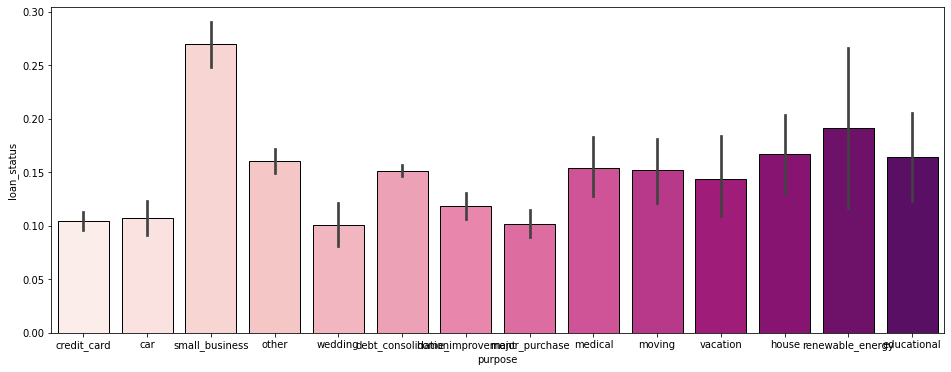

In [296]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(16, 6))
plotting_categorical('purpose')

In [297]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [298]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [299]:
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [300]:
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

You can see that the number of loans has increased steadily across years. 

In [301]:
# number of loans across months
df.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

Most loans are granted in December, and in general in the latter half of the year.

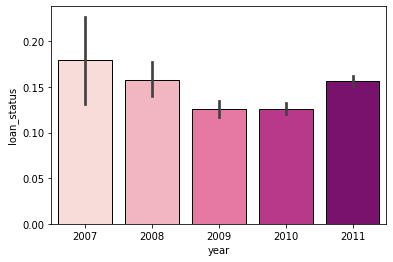

In [302]:
# lets compare the default rates across years
# the default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010
plotting_categorical('year')

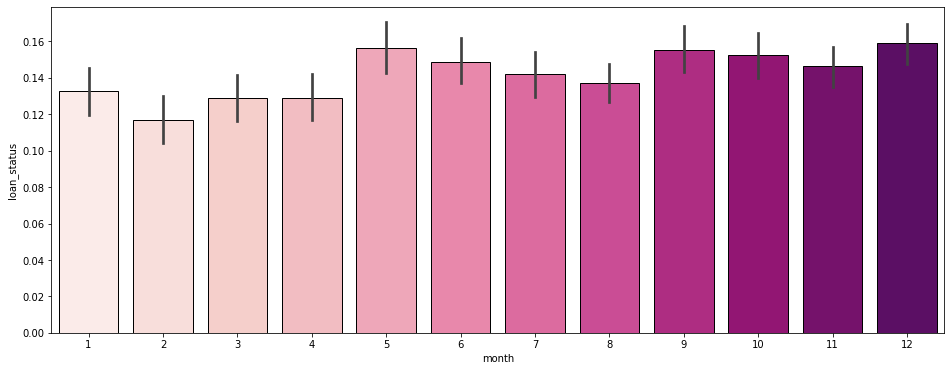

In [303]:
# comparing default rates across months: not much variation across months
plt.figure(figsize=(16, 6))
plotting_categorical('month')

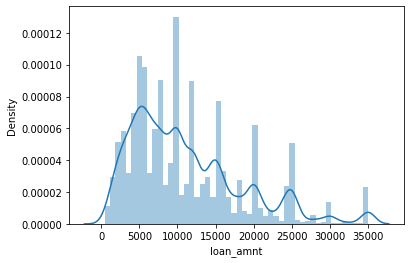

In [304]:
# loan amount: the median loan amount is around 10,000
sns.distplot(df['loan_amnt'])
plt.show()

In [308]:
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))


In [309]:
df['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

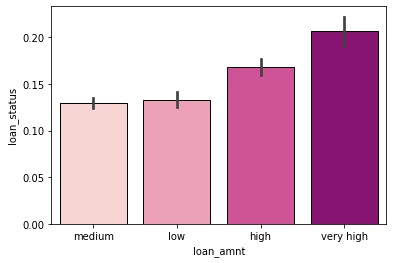

In [310]:
#plotting loan amount vs loan status 
plotting_categorical('loan_amnt')

In [312]:
# let's also convert funded amount invested to bins
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_amount(x))

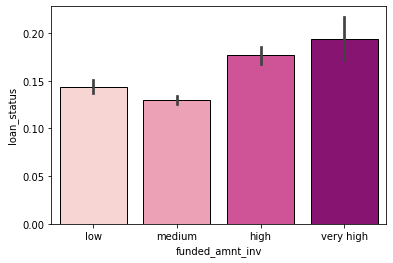

In [313]:
# plot of funded amount invested vs loan status
plotting_categorical('funded_amnt_inv')

In [314]:
# grouping loan amount on the basis of interest rate

def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

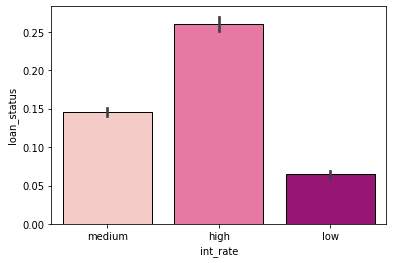

In [318]:
plotting_categorical('int_rate')

In [316]:
# grouping of debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: dti(x))

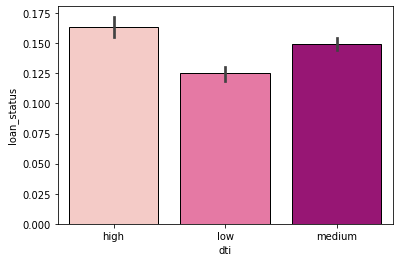

In [317]:
plotting_categorical('dti')

In [320]:
# grouping funded amount into low medium and high 
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

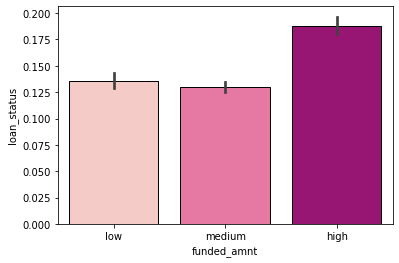

In [321]:
plotting_categorical('funded_amnt')


In [323]:
# installment dividing into the respective bins into Low, Medium, High and very High
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

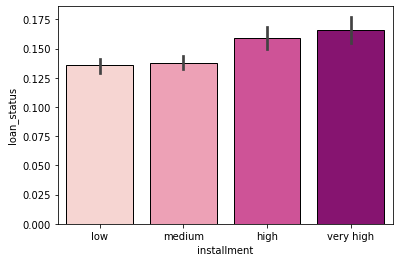

In [324]:
plotting_categorical('installment')

In [325]:
# annual income dividing into the respective bins into Low, Medium, High and very High
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

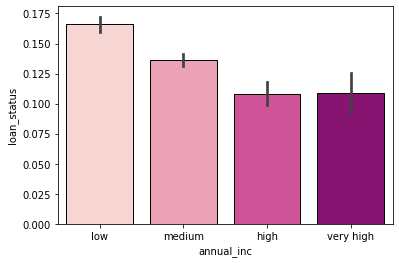

In [326]:
# annual income and default rate
# lower the annual income, higher the default rate
plotting_categorical('annual_inc')

In [327]:
# employment length
# first, let's drop the missing value observations in emp length
df = df[~df['emp_length'].isnull()]

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

df['emp_length'] = df['emp_length'].apply(lambda x: emp_length(x))

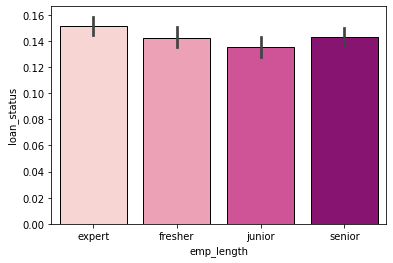

In [329]:
# emp_length and default rate
# not much of a predictor of default
plotting_categorical('emp_length')

## Segmented Univariate Analysis

Segmented Univariate Analysis is one of the simplest form of visualization to analyze data. In its name ‘Uni’ means one which itself describes that it considers only a single data variable for analysis. analysis. Segmented analysis here means that the data variable is analyzed in subsets and is very useful as it can show the change metric in pattern across the different segments of the same variable.

We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc. 

This comes from business understanding, though let's again have a look at the default rates across the purpose of the loan.


In [351]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

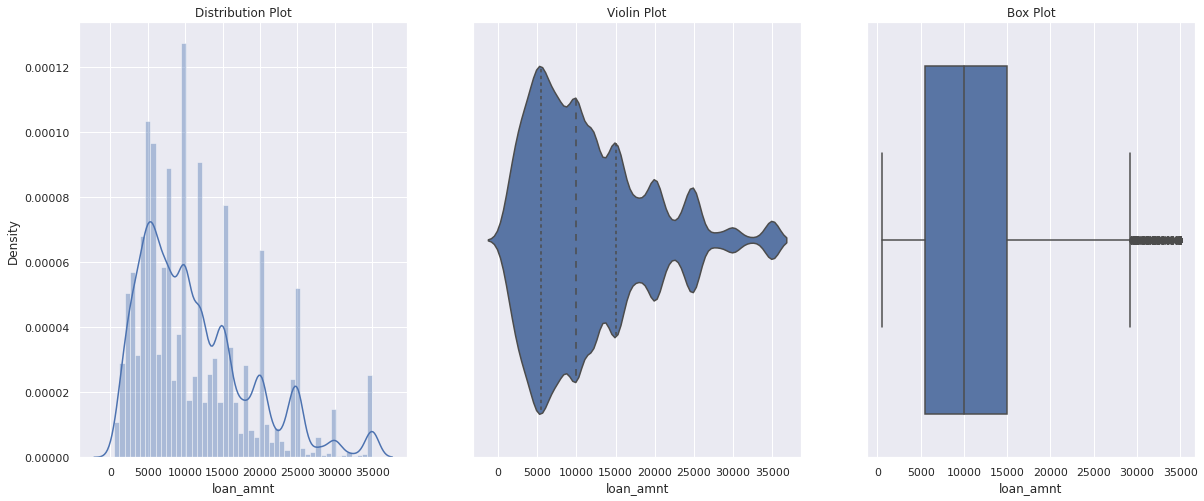

In [352]:
univariate(df=inp0,col='loan_amnt',vartype=0)

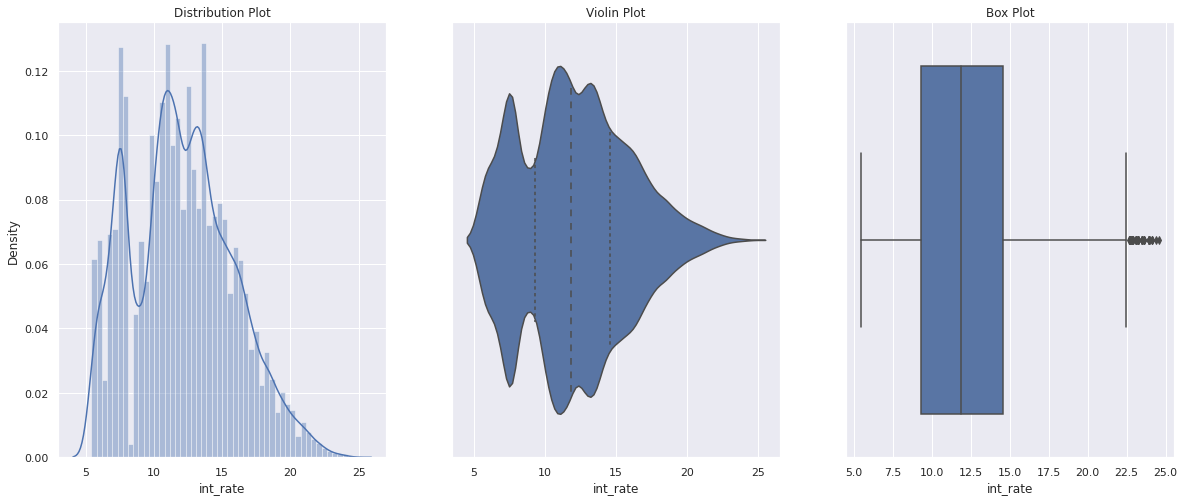

In [353]:
univariate(df=inp0,col='int_rate',vartype=0)

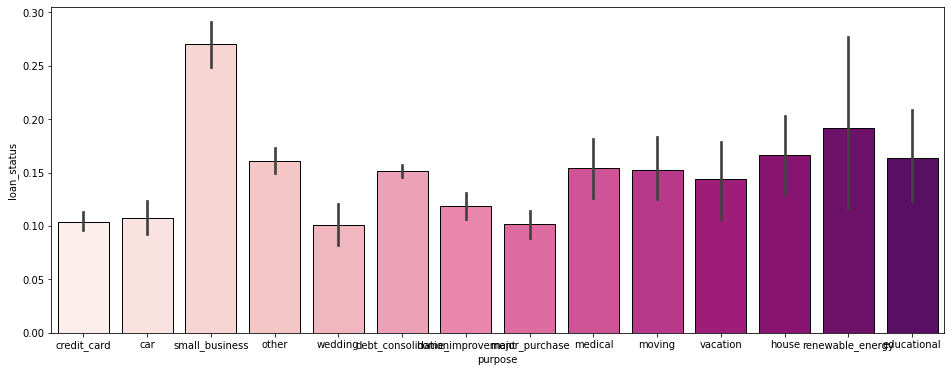

In [330]:
plt.figure(figsize=(16, 6))
plotting_categorical('purpose')

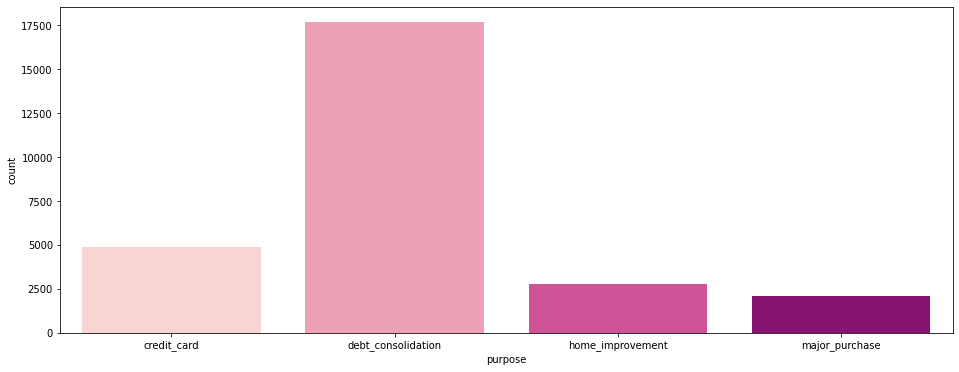

In [334]:
plt.figure(figsize=(16, 6))
sns.countplot(x='purpose', data=df, palette = 'RdPu')
plt.show()

In [332]:
# Analysizing on the basis of types of cards
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

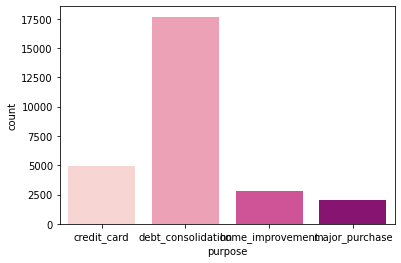

In [335]:
# plotting number of loans by purpose 
sns.countplot(x=df['purpose'], palette = 'RdPu')
plt.show()

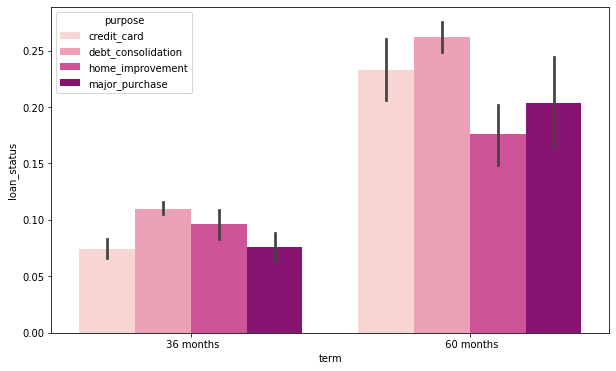

In [336]:
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df, palette = 'RdPu')
plt.show()


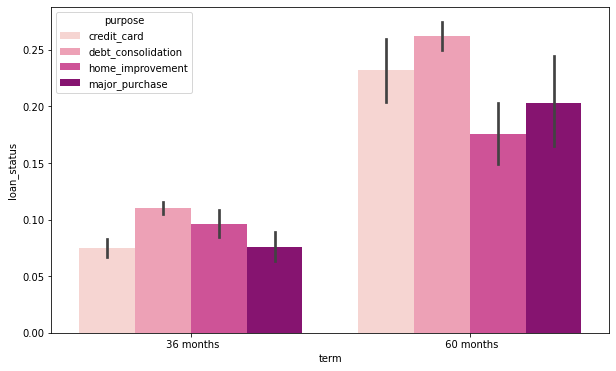

In [337]:
#function for inputing cat_term and outputing loan status
def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df, palette = 'RdPu')
    plt.show()

    
plot_segmented('term')

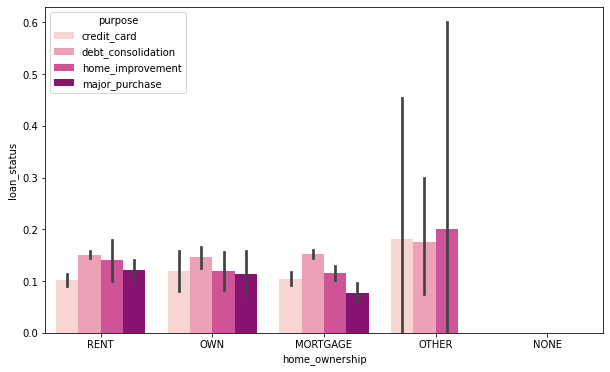

In [339]:
# home ownership 
plot_segmented('home_ownership')

In general, debt consolidation loans have the highest default rates. Lets compare across other categories as well.

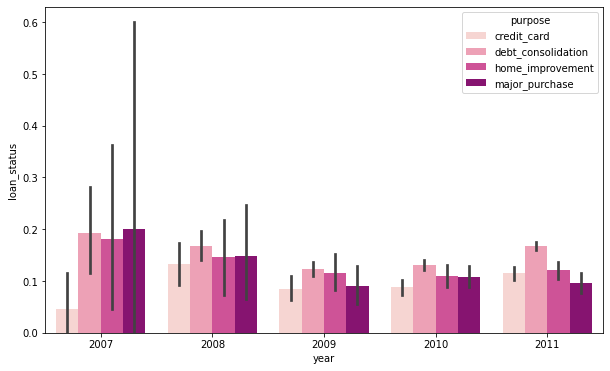

In [340]:
# year
plot_segmented('year')

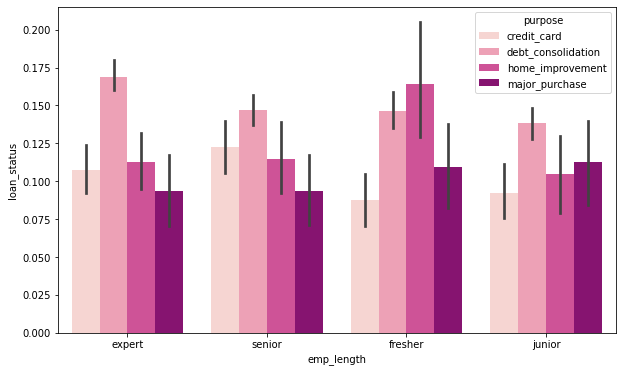

In [341]:
# emp_length
plot_segmented('emp_length')

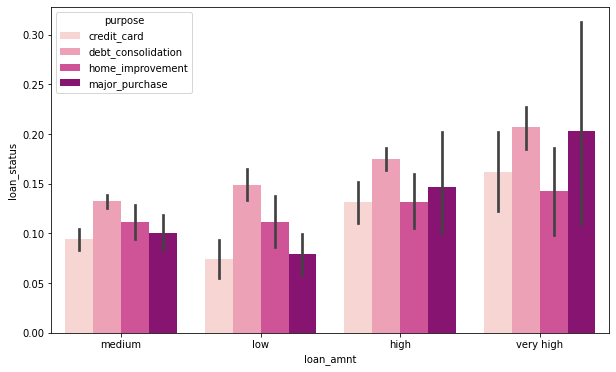

In [342]:
# loan_amnt: same trend across loan purposes
plot_segmented('loan_amnt')

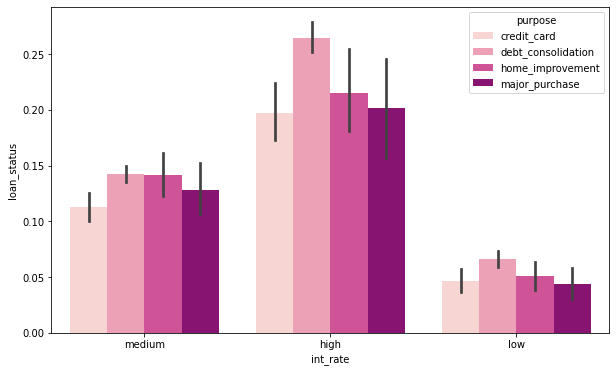

In [343]:
# interest rate
plot_segmented('int_rate')

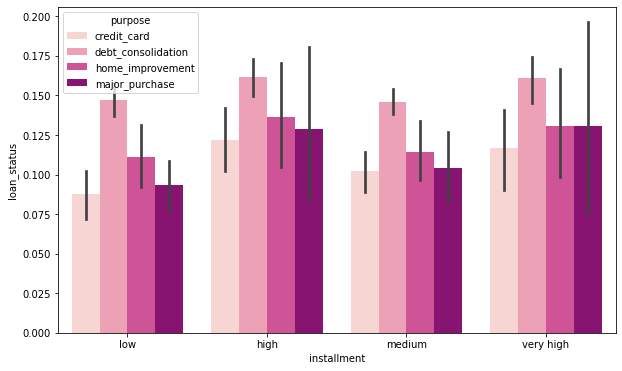

In [344]:
# installment
plot_segmented('installment')

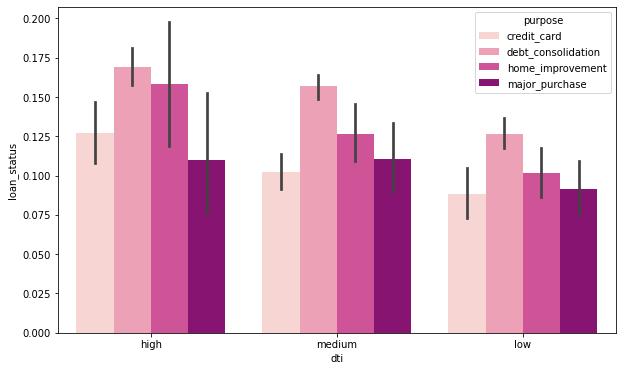

In [345]:
# debt to income ratio
plot_segmented('dti')

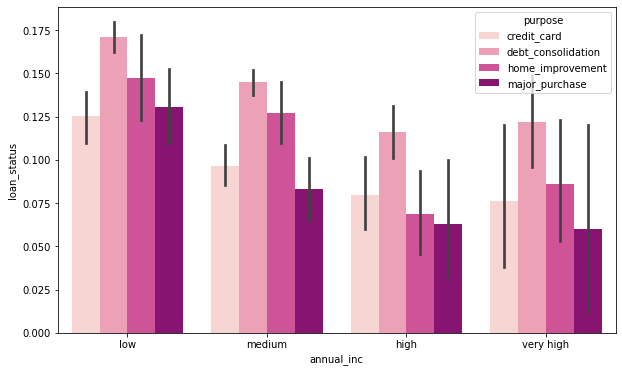

In [346]:
# annual income
plot_segmented('annual_inc')

A good way to quantify th effect of a categorical variable on default rate is to see 'how much does the default rate vary across the categories'. 

Let's see an example using annual_inc as the categorical variable.

In [347]:
# variation of default rate across annual_inc
df.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
low          0.157966
medium       0.130075
very high    0.101570
high         0.097749
Name: loan_status, dtype: float64

In [348]:
def diff_rate(cat_var):
    default_rates = df.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diff_rate('annual_inc')
print(default_rates) 
print(diff)


annual_inc
low          0.16
medium       0.13
very high    0.10
high         0.10
Name: loan_status, dtype: float64
0.06


Thus, there is a 6% increase in default rate as you go from high to low annual income. We can compute this difference for all the variables and roughly identify the ones that affect default rate the most.

In [349]:
# filtering all the object type variables
df_categorical = df.loc[:, df.dtypes == object]
df_categorical['loan_status'] = df['loan_status']

# Now, for each variable, we can compute the incremental diff in default rates
print([i for i in df.columns])

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'month', 'year']


In [350]:
# storing the diff of default rates for each column in a dict
d = {key: diff_rate(key)[1]*100 for key in df_categorical.columns if key != 'loan_status'}
print(d)

{'loan_amnt': 7.000000000000001, 'funded_amnt': 5.0, 'funded_amnt_inv': 6.0, 'term': 15.0, 'int_rate': 19.0, 'installment': 3.0, 'grade': 27.0, 'sub_grade': 46.0, 'emp_title': 100.0, 'emp_length': 2.0, 'home_ownership': 16.0, 'annual_inc': 6.0, 'verification_status': 4.0, 'pymnt_plan': 0.0, 'purpose': 5.0, 'dti': 5.0, 'initial_list_status': 0.0}


##Bivariate/Multivariate Analysis

Bivariate/Multivariate Analysis finds out the relationship between two/two or more variables.We can perform Bivariate/Multivariate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.

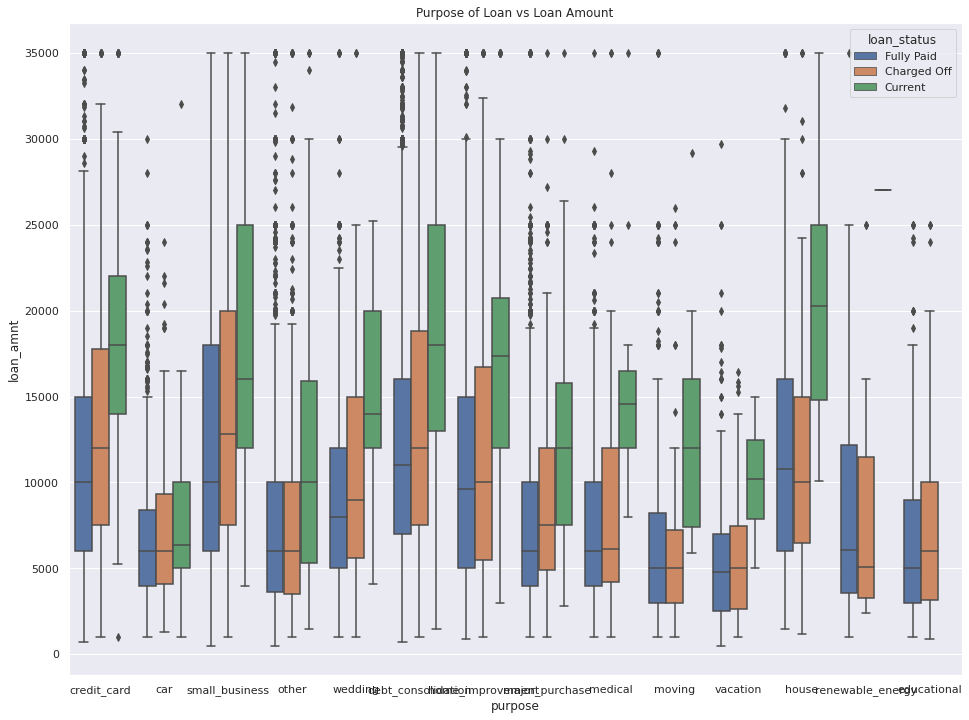

In [358]:
# Purpose of Loan vs Loan Amount for each Loan Status
plt.figure(figsize=(16,12))
sns.boxplot(data =inp0, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

In [360]:
# Correlation Matrix : All Continuos(Numeric) Variable
loan_correlation = inp0.corr()
loan_correlation

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,1.000000,0.993613,0.146473,0.156799,0.255363,0.083189,0.090195,0.113486,0.012165,0.095810,...,0.034133,-0.013182,0.125320,NaN,NaN,NaN,NaN,NaN,-0.011940,NaN
member_id,0.993613,1.000000,0.145538,0.155103,0.264067,0.079202,0.084893,0.117823,0.013059,0.097031,...,0.032250,-0.014982,0.126696,NaN,NaN,NaN,NaN,NaN,-0.011510,NaN
loan_amnt,0.146473,0.145538,1.000000,0.981393,0.939012,0.307613,0.929744,0.154473,0.268447,0.065482,...,0.134968,0.072225,0.447762,NaN,NaN,NaN,NaN,NaN,-0.033197,NaN
funded_amnt,0.156799,0.155103,0.981393,1.000000,0.957579,0.310837,0.955872,0.154030,0.264129,0.065429,...,0.135738,0.073994,0.452287,NaN,NaN,NaN,NaN,NaN,-0.034501,NaN
funded_amnt_inv,0.255363,0.264067,0.939012,0.957579,1.000000,0.305088,0.903743,0.164863,0.251720,0.074094,...,0.123347,0.059722,0.441750,NaN,NaN,NaN,NaN,NaN,-0.039437,NaN
int_rate,0.083189,0.079202,0.307613,0.310837,0.305088,1.000000,0.280382,0.005765,0.050323,0.112549,...,0.122439,0.066302,0.157218,NaN,NaN,NaN,NaN,NaN,0.082272,NaN
installment,0.090195,0.084893,0.929744,0.955872,0.903743,0.280382,1.000000,0.124807,0.267627,0.053055,...,0.117402,0.074805,0.400253,NaN,NaN,NaN,NaN,NaN,-0.030284,NaN
emp_length,0.113486,0.117823,0.154473,0.154030,0.164863,0.005765,0.124807,1.000000,0.111838,0.051119,...,0.024795,0.006258,0.077382,NaN,NaN,NaN,NaN,NaN,0.061086,NaN
annual_inc,0.012165,0.013059,0.268447,0.264129,0.251720,0.050323,0.267627,0.111838,1.000000,-0.124708,...,0.021260,0.015412,0.138441,NaN,NaN,NaN,NaN,NaN,-0.012890,NaN
dti,0.095810,0.097031,0.065482,0.065429,0.074094,0.112549,0.053055,0.051119,-0.124708,1.000000,...,0.023776,0.009851,0.006056,NaN,NaN,NaN,NaN,NaN,0.006023,NaN


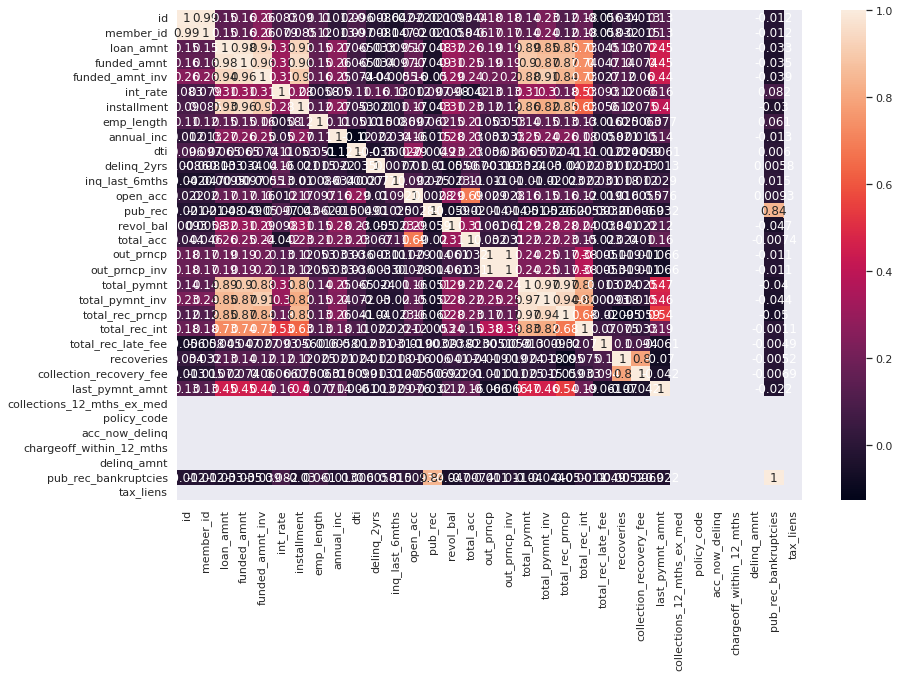

In [361]:

#HeatMap: All continuos variables

f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()